# Preparing Data for Modelling

## 1. Import Libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("auction_data_cleaned.csv")
df.shape

(1227, 32)

## 2. Checking for Null

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   artist                       1227 non-null   object 
 1   critically_acclaimed         1227 non-null   object 
 2   followers                    1227 non-null   object 
 3   sell-through rate            1227 non-null   float64
 4   yearly_lots_sold             1227 non-null   int64  
 5   avg_sales_price              1227 non-null   int64  
 6   lot_number                   1227 non-null   int64  
 7   birth_year                   1174 non-null   float64
 8   death_year                   939 non-null    float64
 9   is_artist_deceased           1227 non-null   int64  
 10  artist_age_at_death          938 non-null    float64
 11  artist_age_at_creation       640 non-null    float64
 12  painting_age                 694 non-null    float64
 13  year_created      

In [13]:
# Calculate missing value percentage per column
percentage_null = (df.isnull().sum() / len(df)) * 100

# Filter to keep only columns with missing values > 0% and round to 2 decimals
percentage_null = percentage_null[percentage_null > 0].round(2)

print(percentage_null)



birth_year                      4.32
death_year                     23.47
artist_age_at_death            23.55
artist_age_at_creation         47.84
painting_age                   43.44
year_created                   43.44
height                          1.22
final_sold_price_USD           29.58
impute_final_sold_price_USD    53.71
% _above_high_estimate         29.58
% _below_low_estimate          29.58
sold_below_low_estimate        29.58
% _over_median_estimate        29.58
dtype: float64


In [14]:
# Drop 'death_year' and 'artist_age_at_death' because 'is_artist_deceased' already answers if the artist is deceased
df.drop(['death_year', 'artist_age_at_death'], axis=1, inplace=True)

# Drop 'final_sold_price_USD' as it replace by 'impute_final_sold_price_USD' replace
df.drop('final_sold_price_USD', axis=1, inplace=True)

# Drop 'sold_below_low_estimate' as it is not required
df.drop('sold_below_low_estimate', axis=1, inplace=True)

df.shape

(1227, 28)

## 3. Feature Engineering         

- **Keep** `birth_year`, `year_created`, and `height` as they are potentially valuable for modeling.
- **Manually impute** missing values for these columns using online research (Google, ChatGPT, etc.).
- **Postpone** creating `artist_age_at_creation` and `painting_age` until after `birth_year` and `year_created` are filled.
- For the following features:
  - `%_above_high_estimate`
  - `%_below_low_estimate`
  - `%_over_median_estimate`
  
  **Plan** to convert them into **categorical variables** rather than keeping numeric `0` values.
  
  - A `0` is ambiguous — it may indicate the artwork was **not sold**, not that it sold for **exactly $0**.
  - Categorical encoding will make the data clearer and more appropriate for modeling.


In [15]:
df.head(10)

,artist,critically_acclaimed,followers,sell-through rate,yearly_lots_sold,avg_sales_price,lot_number,birth_year,is_artist_deceased,artist_age_at_creation,...,estimate_price_USD_min,estimate_price_USD_max,estimate_price_USD_median,impute_final_sold_price_USD,is_artwork_sold,% _above_high_estimate,% _below_low_estimate,% _over_median_estimate,filename,category
0,Glendon Cordell,No,117,0.954,7,24000,801,1980.0,0,39.0,...,19290.0,38580.0,28935.0,28935.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
1,Sarah Ann Weber,No,439,0.400,1,11000,802,1988.0,0,34.0,...,10288.0,19290.0,14789.0,14789.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
2,Tang Yunyu Tang Yun,No,0,0.000,0,0,803,1906.0,1,74.0,...,10288.0,19290.0,14789.0,14789.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
3,Chen Chengwei,No,13,0.630,1,4800,804,1984.0,0,35.0,...,4501.0,8359.0,6430.0,6430.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
4,Arie Smit,No,77,0.630,3,25000,805,1916.0,1,48.0,...,38580.0,64300.0,51440.0,51440.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
5,Andre Brasilier,No,1300,0.897,35,84000,806,1929.0,0,61.0,...,25720.0,38580.0,32150.0,30864.0,1,-0.20,0.2,-0.04,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
6,Andre Brasilier,No,1300,0.897,35,84000,807,1929.0,0,31.0,...,38580.0,64300.0,51440.0,46296.0,1,-0.28,0.2,-0.10,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
7,Bernard Cathelin,No,386,1.000,3,15000,808,1919.0,1,58.0,...,12860.0,25720.0,19290.0,15432.0,1,-0.40,0.2,-0.20,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
8,Tomokazu Matsuyama,No,3300,0.851,13,140000,809,1976.0,0,34.0,...,10288.0,15432.0,12860.0,12860.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary
9,Javier Calleja,No,5500,0.816,38,150000,810,1978.0,0,43.0,...,38580.0,64300.0,51440.0,51440.0,0,NaN,NaN,NaN,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary


In [16]:
# Fill 'impute_final_sold_price_USD' missing values with 'estimate_price_USD_median'
df['impute_final_sold_price_USD'] = df['impute_final_sold_price_USD'].fillna(df['estimate_price_USD_median'])
df['final_sold_price'] = df['impute_final_sold_price_USD']
df.drop('impute_final_sold_price_USD', axis=1, inplace=True)

# Check if there are still missing values
print(df['final_sold_price'].isnull().any())

False


In [17]:
# Create new boolean features comparing 'final_sold_price' against estimate price ranges
df['sold_above_high_estimate'] = df['final_sold_price'] > df['estimate_price_USD_max']
df['sold_above_median_estimate'] = df['final_sold_price'] > df['estimate_price_USD_median']
df['sold_below_low_estimate'] = df['final_sold_price'] < df['estimate_price_USD_min']

# Drop the old percentage-based features, as they are now replaced by the boolean versions
df.drop(['% _above_high_estimate', '% _below_low_estimate', '% _over_median_estimate'], axis=1, inplace=True)

df

,artist,critically_acclaimed,followers,sell-through rate,yearly_lots_sold,avg_sales_price,lot_number,birth_year,is_artist_deceased,artist_age_at_creation,...,estimate_price_USD_min,estimate_price_USD_max,estimate_price_USD_median,is_artwork_sold,filename,category,final_sold_price,sold_above_high_estimate,sold_above_median_estimate,sold_below_low_estimate
0,Glendon Cordell,No,117,0.9540,7,24000,801,1980.0,0,39.0,...,19290.0,38580.0,28935.0,0,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary,28935.0,False,False,False
1,Sarah Ann Weber,No,439,0.4000,1,11000,802,1988.0,0,34.0,...,10288.0,19290.0,14789.0,0,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary,14789.0,False,False,False
2,Tang Yunyu Tang Yun,No,0,0.0000,0,0,803,1906.0,1,74.0,...,10288.0,19290.0,14789.0,0,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary,14789.0,False,False,False
3,Chen Chengwei,No,13,0.6300,1,4800,804,1984.0,0,35.0,...,4501.0,8359.0,6430.0,0,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary,6430.0,False,False,False
4,Arie Smit,No,77,0.6300,3,25000,805,1916.0,1,48.0,...,38580.0,64300.0,51440.0,0,Modern_n_Contemporary_Discoveries_2024_HK.pdf,Modern Contemporary,51440.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,George Romney,Yes,279,0.6000,4,52000,1031,1734.0,1,NaN,...,60000.0,80000.0,70000.0,1,The_Vision_of_Aso_O._Tavitian_Master_2025.pdf,Old Masters,70000.0,False,False,False
1223,Giovanni Battista Lampi,No,0,0.4673,1,25000,1032,1751.0,1,NaN,...,80000.0,120000.0,100000.0,1,The_Vision_of_Aso_O._Tavitian_Master_2025.pdf,Old Masters,100000.0,False,False,False
1224,Jean-Baptiste Pillement,No,20,0.7050,4,32000,1034,1727.0,1,NaN,...,200000.0,300000.0,250000.0,1,The_Vision_of_Aso_O._Tavitian_Master_2025.pdf,Old Masters,250000.0,False,False,False
1225,Henri-Pierre Danloux,No,2,0.5794,1,24000,1035,1753.0,1,NaN,...,80000.0,120000.0,100000.0,0,The_Vision_of_Aso_O._Tavitian_Master_2025.pdf,Old Masters,100000.0,False,False,False


In [18]:
# Convert 'critically_acclaimed' from string ('Yes'/'No') to boolean (True/False)
df['critically_acclaimed'] = df['critically_acclaimed'].map({'Yes': True, 'No': False})

# Encode 'category': map 'Old Masters' to 0 and 'Modern Contemporary' to 1
df['category'] = df['category'].map({'Old Masters': 0, 'Modern Contemporary': 1})


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   artist                      1227 non-null   object 
 1   critically_acclaimed        1225 non-null   object 
 2   followers                   1227 non-null   object 
 3   sell-through rate           1227 non-null   float64
 4   yearly_lots_sold            1227 non-null   int64  
 5   avg_sales_price             1227 non-null   int64  
 6   lot_number                  1227 non-null   int64  
 7   birth_year                  1174 non-null   float64
 8   is_artist_deceased          1227 non-null   int64  
 9   artist_age_at_creation      640 non-null    float64
 10  painting_age                694 non-null    float64
 11  year_created                694 non-null    float64
 12  title                       1227 non-null   object 
 13  medium                      1227 

In [ ]:
# Checking 'is_artwork_sold' for anomalies as shouldn't be a str
df['is_artwork_sold'].sample(n=10, random_state=42)

1046         0
289          1
1067         1
290          1
101          1
650          1
588      $-   
123          1
591          1
428          1
Name: is_artwork_sold, dtype: object

In [21]:
# Strip spaces
df['is_artwork_sold'] = df['is_artwork_sold'].astype(str).str.strip()

# Replace weird '$-' with 0
df['is_artwork_sold'] = df['is_artwork_sold'].replace({'$-': 0})

# Define type conversions
type_conversions = {
    'critically_acclaimed': 'bool',
    'followers': 'int',
    'birth_year': 'Int64',
    'artist_age_at_creation': 'Int64',
    'painting_age': 'Int64',
    'year_created': 'Int64',
    'is_artwork_sold': 'int'
}

# Apply all type conversions
df = df.astype(type_conversions)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   artist                      1227 non-null   object 
 1   critically_acclaimed        1227 non-null   bool   
 2   followers                   1227 non-null   int64  
 3   sell-through rate           1227 non-null   float64
 4   yearly_lots_sold            1227 non-null   int64  
 5   avg_sales_price             1227 non-null   int64  
 6   lot_number                  1227 non-null   int64  
 7   birth_year                  1174 non-null   Int64  
 8   is_artist_deceased          1227 non-null   int64  
 9   artist_age_at_creation      640 non-null    Int64  
 10  painting_age                694 non-null    Int64  
 11  year_created                694 non-null    Int64  
 12  title                       1227 non-null   object 
 13  medium                      1227 

## 4. Investigating Dataset

In [22]:
# Display large numbers normally instead of scientific notation in pandas
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()


,followers,sell-through rate,yearly_lots_sold,avg_sales_price,lot_number,birth_year,is_artist_deceased,artist_age_at_creation,painting_age,year_created,width,height,painting_size_cm²,estimate_price_USD_min,estimate_price_USD_max,estimate_price_USD_median,is_artwork_sold,category,final_sold_price
count,1227.00,1227.00,1227.00,1227.00,1227.00,1174.00,1227.00,640.00,694.00,694.00,1227.00,1212.00,1227.00,1227.00,1227.00,1227.00,1227.00,1227.00,1227.00
mean,7737.74,0.60,23.24,151229.13,247.81,1822.61,0.77,47.64,81.76,1943.24,73.31,73.75,7107.35,145228.94,212211.86,178720.40,0.70,0.46,196656.33
std,33096.71,0.25,82.29,910535.72,273.94,141.98,0.42,15.97,95.89,95.89,47.79,50.82,10097.94,732627.56,1068386.99,900152.72,0.46,0.50,953762.83
min,0.00,0.00,0.00,0.00,1.00,1300.00,0.00,3.00,1.00,1430.00,5.60,4.00,0.00,257.20,514.40,385.80,0.00,0.00,154.32
25%,0.00,0.50,1.00,11000.00,64.00,1752.25,1.00,36.00,22.00,1925.00,40.00,40.00,1599.68,6375.00,9501.00,8000.00,0.00,0.00,8848.00
50%,77.00,0.62,2.00,25000.00,142.00,1864.00,1.00,46.00,54.00,1971.00,61.00,62.70,3850.50,12860.00,20000.00,17500.00,1.00,0.00,17564.40
75%,1400.00,0.78,10.00,84000.00,324.50,1929.00,1.00,58.00,100.00,2003.00,93.00,94.93,8141.30,37920.00,52370.00,44240.00,1.00,1.00,50000.00
max,257000.00,1.00,735.00,28500000.00,1036.00,1999.00,1.00,93.00,595.00,2024.00,363.00,611.00,119264.40,12000000.00,18000000.00,15000000.00,1.00,1.00,13650000.00


In [23]:
# Automatically detect 0/1 columns and treat them as boolean
boolean_like = df.nunique() == 2  # Finds columns with exactly 2 unique values
boolean_features = df.loc[:, boolean_like].astype('bool')
boolean_features.apply(pd.Series.value_counts)

,critically_acclaimed,is_artist_deceased,is_artwork_sold,category,sold_above_high_estimate,sold_above_median_estimate,sold_below_low_estimate
False,880,288,363,660,1061,1000,1098
True,347,939,864,567,166,227,129


### **Observations**

**Critically Acclaimed Artists**
- More critically acclaimed artworks come from living artists (880 vs. 347).

**Deceased Artists**
- A majority of artworks (939 out of 1227) are by deceased artists, as expected.

**Artwork Sales**
- 864 artworks were sold, indicating a strong overall sell-through rate.

**Estimate Performance**
- Only a small fraction exceeded the high (166) or median (227) estimates — beating expectations is rare.

**Important Note**
- Estimate-related features are evaluated across all artworks, not just sold ones, which explains why totals do not match the number of artwork sold.


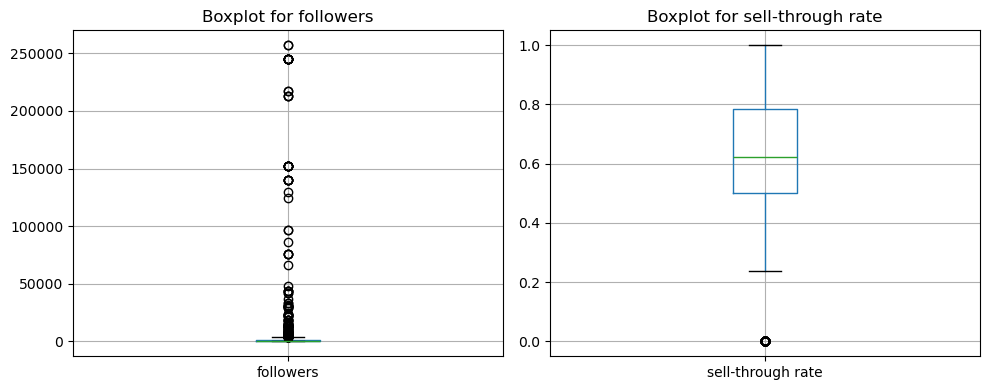

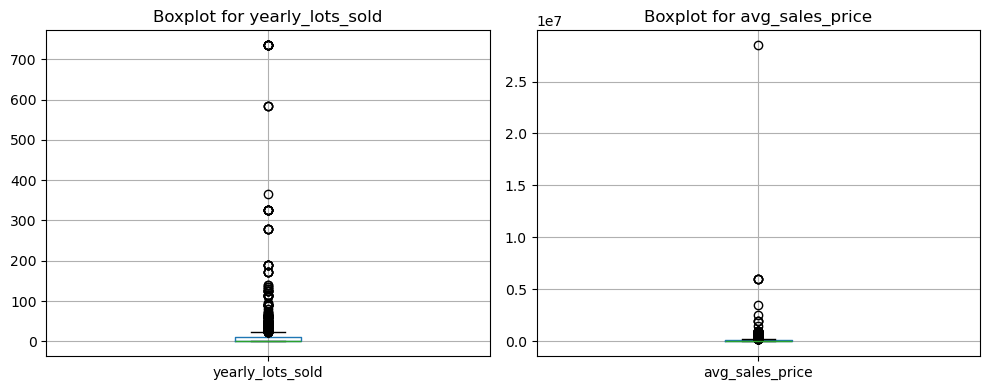

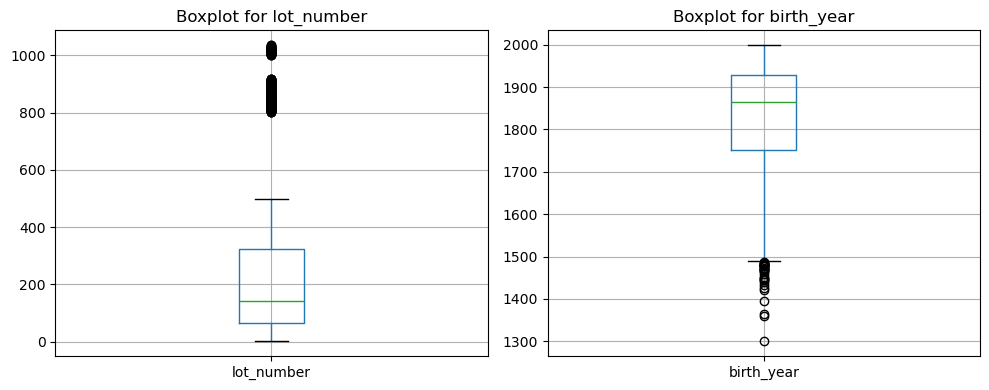

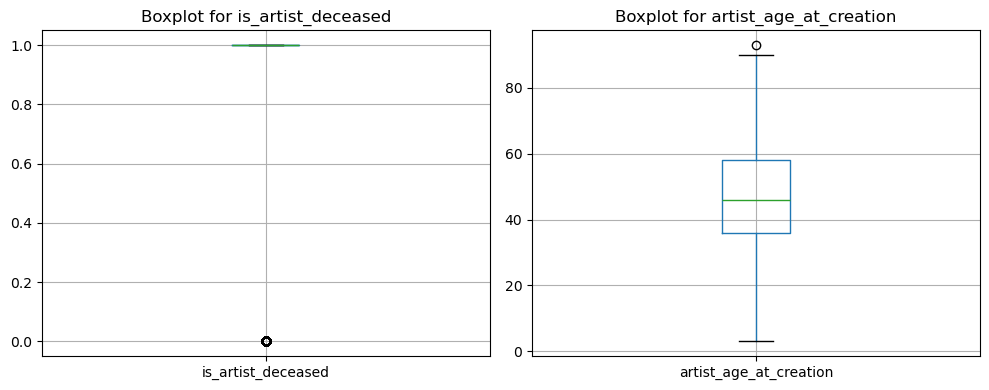

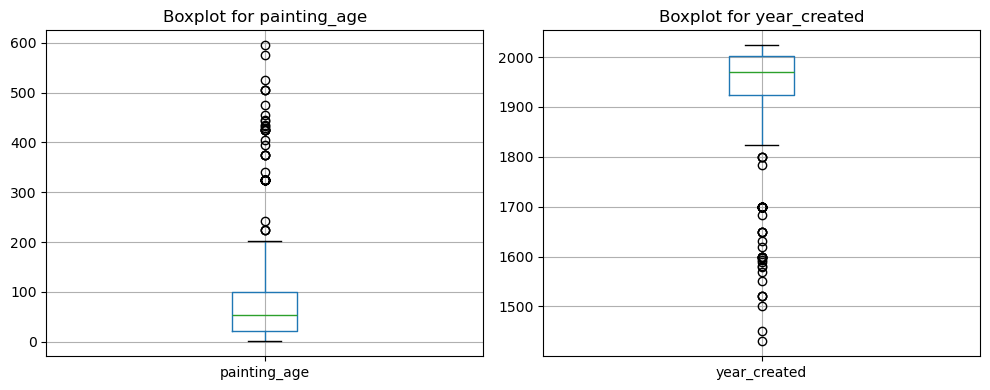

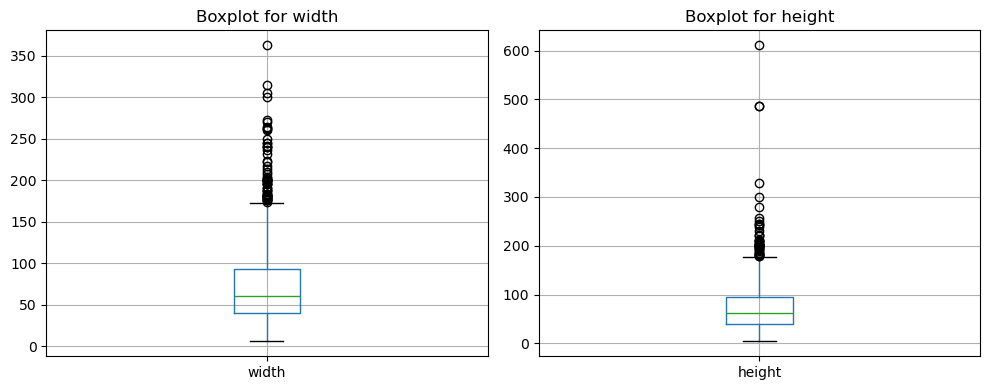

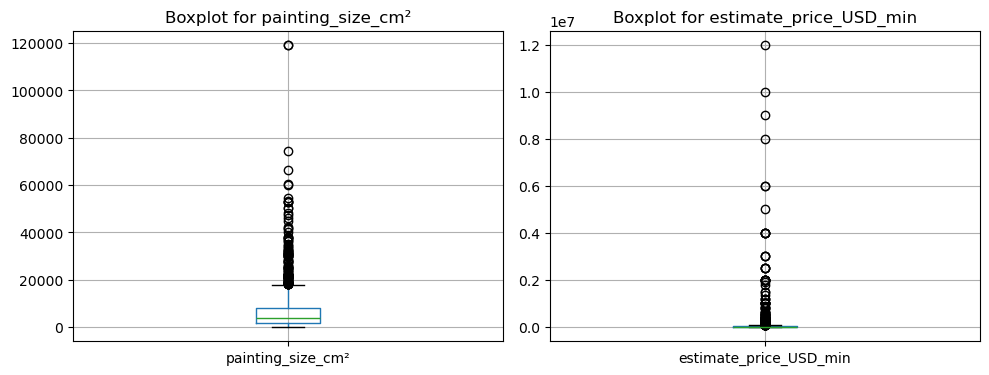

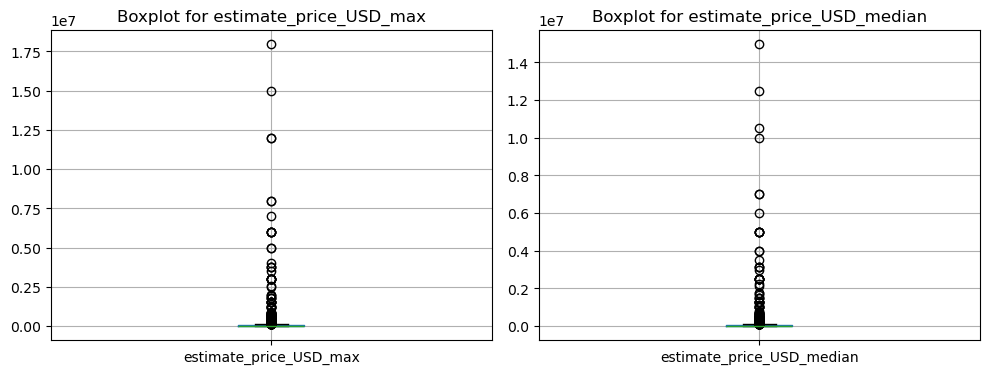

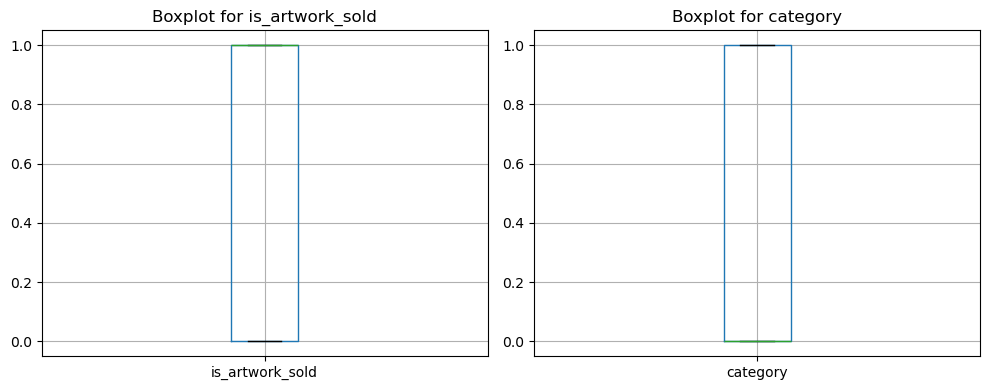

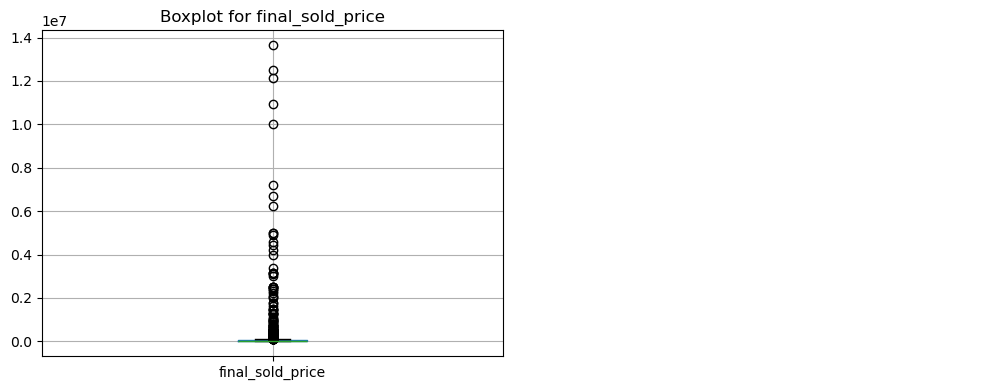

In [24]:
# Select only numeric columns (float64 or int64 types) from df
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(0, len(numeric_cols), 2):  # Go 2 columns at a time
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 charts

    # Loop through the two subplots (left and right)
    for j in range(2):
        if i + j < len(numeric_cols): # Check if the current column index exists
            df.boxplot(column=numeric_cols[i + j], ax=axes[j]) # Plot boxplot for the current numeric column
            axes[j].set_title(f'Boxplot for {numeric_cols[i + j]}')  # Set a title for the boxplot
        else:
            axes[j].axis('off')  # Turn off empty chart if number is odd

    plt.tight_layout()
    plt.show()


### **Observations**

**Followers, Yearly Lots Sold, Avg Sales Price, Final Sold Price**
- All these variables have a large number of extreme outliers.
- The majority of the data is tightly packed at the lower end of the scale, with a long tail extending upward.
- This indicates high skewness (positively skewed) and suggests that a few artists dominate in followers, lots sold, and prices.

**Sell-Through Rate**
- It looks more normally distributed, centered around 60–70%.
- Some outliers at 0%, but overall, this is much more balanced.

**Painting Age and Year Created**
- **Painting Age** shows that most paintings are relatively recent (under 100 years), but a few very old paintings (several hundred years old) exist.
- **Year Created** shows similar behavior: most paintings are from the 1800s to 2000s, but a few much older artworks (1400s–1700s) are present.

**Width, Height, and Painting Size (cm²)**
- Highly skewed with a lot of outliers — most paintings are moderate in size, but a few are extraordinarily large.

**Outlier Treatment**
- Consider whether to keep, trim, or cap the outliers based on analysis goals:
  - If studying rarity and very high-value sales, **keep** them.
  - If modeling "typical" behavior, **consider log transformations** (e.g., for followers, prices, sales) or trimming extreme values.


In [25]:
# Save dataframe to CSV
df.to_csv("auction_data_updated.csv", index=False)